In [2]:
import pandas as pd
import numpy as np

In [4]:
customers = pd.read_csv('/content/Customers.csv')
products = pd.read_csv('/content/Products.csv')
transactions = pd.read_csv('/content/Transactions.csv')

In [5]:
transactions_customers = pd.merge(transactions, customers, on='CustomerID', how='inner')
data = pd.merge(transactions_customers, products, on='ProductID', how='inner')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price_x          1000 non-null   float64
 7   CustomerName     1000 non-null   object 
 8   Region           1000 non-null   object 
 9   SignupDate       1000 non-null   object 
 10  ProductName      1000 non-null   object 
 11  Category         1000 non-null   object 
 12  Price_y          1000 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 101.7+ KB
None


In [6]:
data.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


In [7]:
customer_features = data.groupby("CustomerID")["TotalValue"].sum().reset_index()
customer_features = customer_features.merge(customers, on="CustomerID")
customer_features

,CustomerID,TotalValue,CustomerName,Region,SignupDate
0,C0001,3354.52,Lawrence Carroll,South America,2022-07-10
1,C0002,1862.74,Elizabeth Lutz,Asia,2022-02-13
2,C0003,2725.38,Michael Rivera,South America,2024-03-07
3,C0004,5354.88,Kathleen Rodriguez,South America,2022-10-09
4,C0005,2034.24,Laura Weber,Asia,2022-08-15
...,...,...,...,...,...
194,C0196,4982.88,Laura Watts,Europe,2022-06-07
195,C0197,1928.65,Christina Harvey,Europe,2023-03-21
196,C0198,931.83,Rebecca Ray,Europe,2022-02-27
197,C0199,1979.28,Andrea Jenkins,Europe,2022-12-03


In [8]:
customer_features.isna().sum()

,0
CustomerID,0
TotalValue,0
CustomerName,0
Region,0
SignupDate,0


In [9]:
# Scale the numeric features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [10]:
numeric_features = customer_features.select_dtypes(include=[np.number])
numeric_features

,TotalValue
0,3354.52
1,1862.74
2,2725.38
3,5354.88
4,2034.24
...,...
194,4982.88
195,1928.65
196,931.83
197,1979.28


In [11]:
customer_features_scaled = scaler.fit_transform(customer_features.select_dtypes(include=[np.number]))
customer_features_scaled

array([[-0.06170143],
       [-0.87774353],
       [-0.40585722],
       [ 1.03254704],
       [-0.78392861],
       [ 0.41587942],
       [-0.48548229],
       [ 0.43997044],
       [-1.40630171],
       [-0.9571662 ],
       [ 0.14369581],
       [ 0.96492372],
       [ 1.38575064],
       [-1.72239508],
       [-1.26353893],
       [ 0.22269727],
       [ 0.70375173],
       [ 0.71908486],
       [-0.70101045],
       [-1.39212827],
       [ 1.0681256 ],
       [ 0.64973294],
       [ 0.92520418],
       [ 0.08736309],
       [-1.02704328],
       [ 0.04471149],
       [-0.49471609],
       [ 1.83377022],
       [-0.9197934 ],
       [-0.50196965],
       [-0.79971578],
       [-1.52856197],
       [-1.82415282],
       [-0.21559072],
       [-0.48122096],
       [-0.8694178 ],
       [ 0.42966447],
       [-0.42146387],
       [ 0.42246014],
       [ 0.27465378],
       [ 1.46737783],
       [-0.58248637],
       [-1.27784912],
       [-0.1297569 ],
       [ 1.39736947],
       [ 1

In [12]:
# Compute cosine similarity
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(customer_features_scaled)
similarity_matrix


array([[ 1.,  1.,  1., ...,  1.,  1., -1.],
       [ 1.,  1.,  1., ...,  1.,  1., -1.],
       [ 1.,  1.,  1., ...,  1.,  1., -1.],
       ...,
       [ 1.,  1.,  1., ...,  1.,  1., -1.],
       [ 1.,  1.,  1., ...,  1.,  1., -1.],
       [-1., -1., -1., ..., -1., -1.,  1.]])

In [13]:
# Step 2: Compute cosine similarity

similarity_df = pd.DataFrame(similarity_matrix, index=customer_features["CustomerID"], columns=customer_features["CustomerID"])
similarity_df

CustomerID,C0001,C0002,C0003,C0004,C0005,C0006,C0007,C0008,C0009,C0010,...,C0191,C0192,C0193,C0194,C0195,C0196,C0197,C0198,C0199,C0200
CustomerID,,,,,,,,,,,,,,,,,,,,,
C0001,1.0,1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,1.0,...,1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0
C0002,1.0,1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,1.0,...,1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0
C0003,1.0,1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,1.0,...,1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0
C0004,-1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0
C0005,1.0,1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,1.0,...,1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C0196,-1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0
C0197,1.0,1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,1.0,...,1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0
C0198,1.0,1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,1.0,...,1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0


In [14]:
# Step 3: Get the top 3 similar customers for each customer
lookalike_results = []
for customer_id in similarity_df.index:
    # Sort values in descending order and skip the first (the customer themselves)
    similar_customers = similarity_df[customer_id].sort_values(ascending=False)[1:4]

    # Only consider customers with a similarity score above a threshold (e.g., 0.7)
    similar_customers_filtered = similar_customers[similar_customers > 0.7]

    # If there are any similar customers, add to the result
    for similar_customer, score in similar_customers_filtered.items():
        lookalike_results.append([customer_id, similar_customer, score])

In [15]:
# Step 4: Save results to CSV, including customer details
lookalike_df = pd.DataFrame(lookalike_results, columns=["CustomerID", "SimilarCustomerID", "SimilarityScore"])

lookalike_df

,CustomerID,SimilarCustomerID,SimilarityScore
0,C0001,C0103,1.0
1,C0001,C0157,1.0
2,C0001,C0098,1.0
3,C0002,C0103,1.0
4,C0002,C0157,1.0
...,...,...,...
592,C0199,C0157,1.0
593,C0199,C0098,1.0
594,C0200,C0101,1.0
595,C0200,C0126,1.0


In [16]:
# Optionally, merge customer names or other relevant details
lookalike_df = lookalike_df.merge(customers[["CustomerID", "CustomerName"]], left_on="SimilarCustomerID", right_on="CustomerID", how="left")
lookalike_df

,CustomerID_x,SimilarCustomerID,SimilarityScore,CustomerID_y,CustomerName
0,C0001,C0103,1.0,C0103,Jennifer Munoz
1,C0001,C0157,1.0,C0157,Miguel Wong
2,C0001,C0098,1.0,C0098,Laura Gilbert
3,C0002,C0103,1.0,C0103,Jennifer Munoz
4,C0002,C0157,1.0,C0157,Miguel Wong
...,...,...,...,...,...
592,C0199,C0157,1.0,C0157,Miguel Wong
593,C0199,C0098,1.0,C0098,Laura Gilbert
594,C0200,C0101,1.0,C0101,Kelsey Roberts
595,C0200,C0126,1.0,C0126,Caitlin Brown


In [17]:
# Save the results to a CSV file
lookalike_df.to_csv("Rajkumar_Pal_Lookalike.csv", index=False)

In [18]:
lookalike = pd.read_csv("Rajkumar_Pal_Lookalike.csv")
lookalike

,CustomerID_x,SimilarCustomerID,SimilarityScore,CustomerID_y,CustomerName
0,C0001,C0103,1.0,C0103,Jennifer Munoz
1,C0001,C0157,1.0,C0157,Miguel Wong
2,C0001,C0098,1.0,C0098,Laura Gilbert
3,C0002,C0103,1.0,C0103,Jennifer Munoz
4,C0002,C0157,1.0,C0157,Miguel Wong
...,...,...,...,...,...
592,C0199,C0157,1.0,C0157,Miguel Wong
593,C0199,C0098,1.0,C0098,Laura Gilbert
594,C0200,C0101,1.0,C0101,Kelsey Roberts
595,C0200,C0126,1.0,C0126,Caitlin Brown


In [19]:
# Step 1: Clean up the DataFrame
lookalike_df = lookalike_df[['CustomerID_x', 'SimilarCustomerID', 'SimilarityScore', 'CustomerID_y', 'CustomerName']]

# Step 2: Rename columns to be more descriptive
lookalike_df.columns = ['CustomerID', 'SimilarCustomerID', 'SimilarityScore', 'MatchedCustomerID', 'CustomerName']

lookalike_df

,CustomerID,SimilarCustomerID,SimilarityScore,MatchedCustomerID,CustomerName
0,C0001,C0103,1.0,C0103,Jennifer Munoz
1,C0001,C0157,1.0,C0157,Miguel Wong
2,C0001,C0098,1.0,C0098,Laura Gilbert
3,C0002,C0103,1.0,C0103,Jennifer Munoz
4,C0002,C0157,1.0,C0157,Miguel Wong
...,...,...,...,...,...
592,C0199,C0157,1.0,C0157,Miguel Wong
593,C0199,C0098,1.0,C0098,Laura Gilbert
594,C0200,C0101,1.0,C0101,Kelsey Roberts
595,C0200,C0126,1.0,C0126,Caitlin Brown


In [20]:
# Step 3: Remove any duplicate rows if necessary (optional)
lookalike_df = lookalike_df.drop_duplicates(subset=['CustomerID', 'SimilarCustomerID'])

# Step 4: Ensure no null values (optional)
lookalike_df = lookalike_df.dropna()

# Step 5: Save the cleaned DataFrame to CSV
lookalike_df.to_csv("Rajkumar_Pal_Lookalike.csv", index=False)

# Check the cleaned data
lookalike_df.head()

,CustomerID,SimilarCustomerID,SimilarityScore,MatchedCustomerID,CustomerName
0,C0001,C0103,1.0,C0103,Jennifer Munoz
1,C0001,C0157,1.0,C0157,Miguel Wong
2,C0001,C0098,1.0,C0098,Laura Gilbert
3,C0002,C0103,1.0,C0103,Jennifer Munoz
4,C0002,C0157,1.0,C0157,Miguel Wong


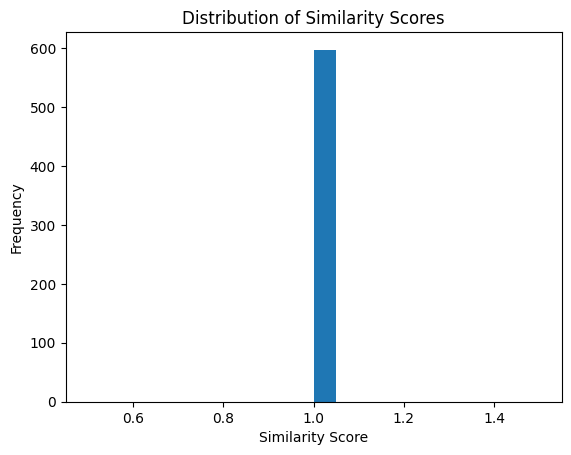

In [21]:
# Step 7: Evaluate the quality of the recommendations
# Visualizing the distribution of similarity scores
import matplotlib.pyplot as plt
similarity_scores = lookalike_df['SimilarityScore']
plt.hist(similarity_scores, bins=20)
plt.title("Distribution of Similarity Scores")
plt.xlabel("Similarity Score")
plt.ylabel("Frequency")
plt.show()

In [22]:
# Optional: Define a threshold to consider a recommendation as 'good'
threshold = 0.7
good_recommendations = lookalike_df[lookalike_df['SimilarityScore'] > threshold]
print(f"Number of good recommendations (Similarity > {threshold}): {good_recommendations.shape[0]}")

Number of good recommendations (Similarity > 0.7): 597


In [23]:
# Step 8: Optional - Manual Evaluation of Random Sample
# You can print or inspect a random sample of the recommendations to manually check if the recommendations are relevant
random_sample = lookalike_df.sample(10)
random_sample[['CustomerID', 'CustomerName', 'SimilarCustomerID', 'SimilarityScore', 'MatchedCustomerID']]


,CustomerID,CustomerName,SimilarCustomerID,SimilarityScore,MatchedCustomerID
22,C0008,Caitlin Brown,C0126,1.0,C0126
107,C0036,Laura Gilbert,C0098,1.0,C0098
474,C0159,Jennifer Munoz,C0103,1.0,C0103
408,C0137,Jennifer Munoz,C0103,1.0,C0103
368,C0123,Laura Gilbert,C0098,1.0,C0098
561,C0189,Jennifer Munoz,C0103,1.0,C0103
95,C0032,Laura Gilbert,C0098,1.0,C0098
82,C0028,Caitlin Brown,C0126,1.0,C0126
139,C0047,Miguel Wong,C0157,1.0,C0157
109,C0037,Caitlin Brown,C0126,1.0,C0126
